### Explore Bike Share Data

For this project, your goal is to ask and answer three questions about the available bikeshare data from Washington, Chicago, and New York.  This notebook can be submitted directly through the workspace when you are confident in your results.

You will be graded against the project [Rubric](https://review.udacity.com/#!/rubrics/2508/view) by a mentor after you have submitted.  To get you started, you can use the template below, but feel free to be creative in your solutions!

In [1]:
library(ggplot2)
suppressPackageStartupMessages(library(dplyr))
library(tidyr)

In [2]:
ny = read.csv('new_york_city.csv')
wash = read.csv('washington.csv')
chi = read.csv('chicago.csv')

In [3]:
head(ny)

X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type,Gender,Birth.Year
5688089,2017-06-11 14:55:05,2017-06-11 15:08:21,795,Suffolk St & Stanton St,W Broadway & Spring St,Subscriber,Male,1998
4096714,2017-05-11 15:30:11,2017-05-11 15:41:43,692,Lexington Ave & E 63 St,1 Ave & E 78 St,Subscriber,Male,1981
2173887,2017-03-29 13:26:26,2017-03-29 13:48:31,1325,1 Pl & Clinton St,Henry St & Degraw St,Subscriber,Male,1987
3945638,2017-05-08 19:47:18,2017-05-08 19:59:01,703,Barrow St & Hudson St,W 20 St & 8 Ave,Subscriber,Female,1986
6208972,2017-06-21 07:49:16,2017-06-21 07:54:46,329,1 Ave & E 44 St,E 53 St & 3 Ave,Subscriber,Male,1992
1285652,2017-02-22 18:55:24,2017-02-22 19:12:03,998,State St & Smith St,Bond St & Fulton St,Subscriber,Male,1986


In [4]:
head(wash)

X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type
1621326,2017-06-21 08:36:34,2017-06-21 08:44:43,489.066,14th & Belmont St NW,15th & K St NW,Subscriber
482740,2017-03-11 10:40:00,2017-03-11 10:46:00,402.549,Yuma St & Tenley Circle NW,Connecticut Ave & Yuma St NW,Subscriber
1330037,2017-05-30 01:02:59,2017-05-30 01:13:37,637.251,17th St & Massachusetts Ave NW,5th & K St NW,Subscriber
665458,2017-04-02 07:48:35,2017-04-02 08:19:03,1827.341,Constitution Ave & 2nd St NW/DOL,M St & Pennsylvania Ave NW,Customer
1481135,2017-06-10 08:36:28,2017-06-10 09:02:17,1549.427,Henry Bacon Dr & Lincoln Memorial Circle NW,Maine Ave & 7th St SW,Subscriber
1148202,2017-05-14 07:18:18,2017-05-14 07:24:56,398.000,1st & K St SE,Eastern Market Metro / Pennsylvania Ave & 7th St SE,Subscriber


In [5]:
head(chi)

X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type,Gender,Birth.Year
1423854,2017-06-23 15:09:32,2017-06-23 15:14:53,321,Wood St & Hubbard St,Damen Ave & Chicago Ave,Subscriber,Male,1992
955915,2017-05-25 18:19:03,2017-05-25 18:45:53,1610,Theater on the Lake,Sheffield Ave & Waveland Ave,Subscriber,Female,1992
9031,2017-01-04 08:27:49,2017-01-04 08:34:45,416,May St & Taylor St,Wood St & Taylor St,Subscriber,Male,1981
304487,2017-03-06 13:49:38,2017-03-06 13:55:28,350,Christiana Ave & Lawrence Ave,St. Louis Ave & Balmoral Ave,Subscriber,Male,1986
45207,2017-01-17 14:53:07,2017-01-17 15:02:01,534,Clark St & Randolph St,Desplaines St & Jackson Blvd,Subscriber,Male,1975
1473887,2017-06-26 09:01:20,2017-06-26 09:11:06,586,Clinton St & Washington Blvd,Canal St & Taylor St,Subscriber,Male,1990


### Question 1


**Your question 1 goes here.**

**The distribution of users' age and gender in two cities, New York and Chicago**

In [6]:
# Let's have a function here to clean our data a little bit:
# Since I will be using the birth year and gender columns, i will make sure they don't have any invaild values.
# This function take a data frame as parameter and remove all null values, and return a clean data frame.

clean_null1 = function(dataFrame){
  new_df <- dataFrame %>% 
    filter(!is.na(Birth.Year), !is.na(Gender)) %>%
    filter(!is.infinite(Birth.Year), !is.infinite(Gender)) %>%
    filter(!is.nan(Birth.Year), !is.nan(Gender)) %>%
    filter(!is.null(Birth.Year), !is.null(Gender)) %>%
    filter(!Birth.Year == "", !Gender == "")
    
# Also, this function will creata a new columns for storing the brith year group values, 
# Use year from 1950 to 2005, group user birth year in each 5 years. 
# Giving label for the year group,
# use the cut function to cut birth year    
        
  breaks <- seq((1950), (2005) + 5,5)
  labels <- paste0(breaks[-length(breaks)] %% 100, "-", (breaks[-1] - 1) %% 100)
  # Create a new column for the birth year groups with custom labels
  new_df$Birth.Year.Group <- cut(new_df$Birth.Year, breaks = breaks, labels = labels)    
  return (new_df)
}

In [7]:
# Function to generate the graph: this function take a data frame as parameter and display the graph that created.

# in this graph, each bar contians both male and female, 
generate_plot1 = function(dataFrame){
  plot <- ggplot(data = na.omit(dataFrame), aes(x = as.factor(Birth.Year.Group))) +
          geom_bar(aes(fill = Gender), stat = "count", width = 0.5) + 
          labs(title = 'Bikeshare users distribution by Gender and Birth Year',
                x = 'Birth Year Group',
                y = 'Count',
                fill = 'Gender')
  print(plot)
}

### New York data

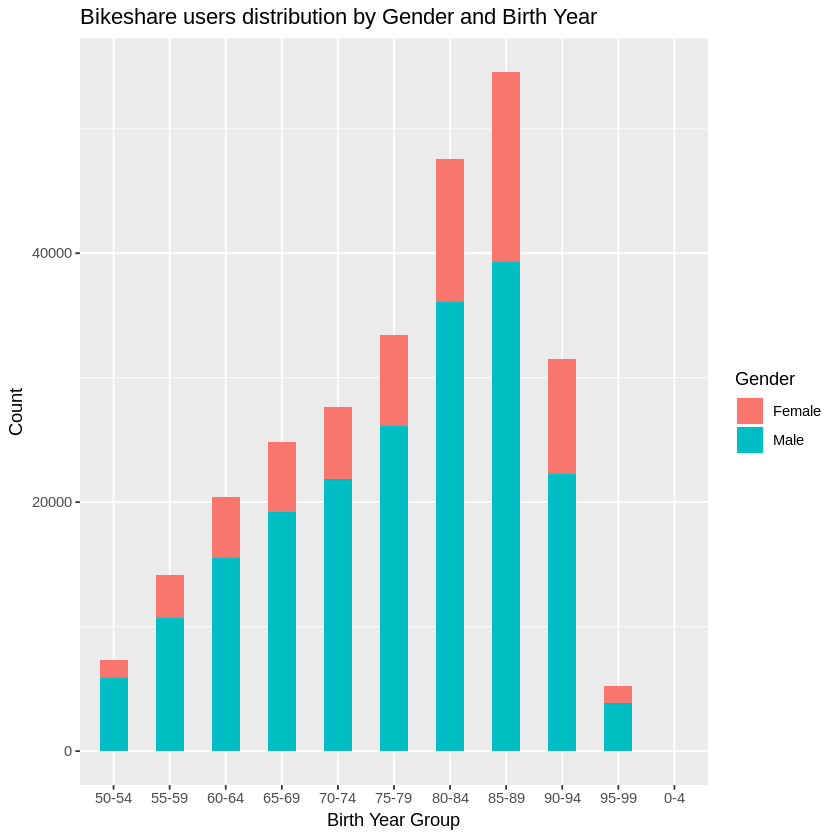

In [8]:
ny_filtered1 = clean_null1(ny)
generate_plot1(ny_filtered1)

### Chicago data

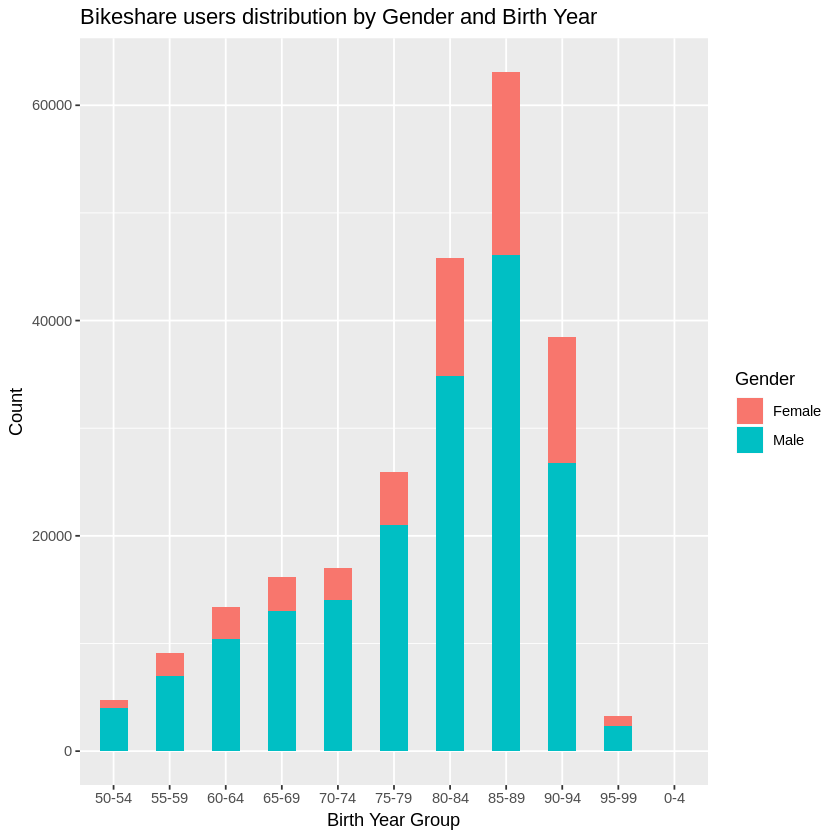

In [9]:
chi_filtered1 = clean_null1(chi)
generate_plot1(chi_filtered1)

In [10]:
# Let take a look of the datat from a bigger scale
print(table(ny_filtered1$Gender))


       Female   Male 
     0  66778 204004 


In [11]:
print(table(ny_filtered1$Birth.Year.Group))


50-54 55-59 60-64 65-69 70-74 75-79 80-84 85-89 90-94 95-99   0-4   5-9 
 7338 14177 20412 24827 27621 33391 47554 54542 31540  5246    38     0 


In [12]:
print(table(ny_filtered1$Birth.Year.Group,ny_filtered1$Gender))

       
              Female  Male
  50-54     0   1487  5851
  55-59     0   3453 10724
  60-64     0   4918 15494
  65-69     0   5636 19191
  70-74     0   5752 21869
  75-79     0   7264 26127
  80-84     0  11442 36112
  85-89     0  15283 39259
  90-94     0   9300 22240
  95-99     0   1387  3859
  0-4       0      3    35
  5-9       0      0     0


---

**As an individual who has not previously utilized a bike-sharing system, I was astounded by the substantial user base for shared bikes. In response to our initial investigation, the graph illuminates a diverse spectrum of users, encompassing individuals from the elderly generation born in the 1950s to the contemporary youth of the millennium.** 

**Regardless of the city, the discernible contrast in colors reveals the consistent predominance of male users within the realm of shared bicycles.Besides the graph, the real data indicate this discovery as well:** 

- Female user is only about 30% of the male user.

**Furthermore, the histogram's elongated bars vividly depict the profound affinity shared bicycle riders born in the 80s hold for this mode of transportation, as evidenced by their representation as the most significant cohort of users. Data from bith New York and Chicago, the birth year of users showed a significant increase after 1975, reaching its peak between 1985 and 1989. In fact, users born from 1980 to 1989 represented more than 30% of the entire sample.However, data from Chicago show that people born from 90-94 also occupies a certain proportion.**

---

### Question 2

**Your question 2 goes here.**

**From our first question, we already know which age group our users mainly come from. However, which age group has the highest subscription rate? From a business point of view, in each city, which age group has the most potential customers?**


In [13]:
# We can use the same approach to obtain the answer that we are looking for. 
# Let's check and remove the not invalid data from the data frame.
print(unique(ny$User.Type))

[1] Subscriber Customer             
Levels:  Customer Subscriber


In [14]:
print(unique(chi$User.Type))

[1] Subscriber Customer   Dependent 
Levels: Customer Dependent Subscriber


In [15]:
# Let's have a function here to clean our data a little bit:
# Since I will be using the birth year and user type columns, i will make sure they don't have any invaild values.
# This function take a data frame as parameter and remove all null values, and return a clean data frame.

clean_null2 = function(dataFrame){
  new_df <- dataFrame %>% 
    filter(!is.na(Birth.Year), !is.na(User.Type)) %>%
    filter(!is.infinite(Birth.Year), !is.infinite(User.Type)) %>%
    filter(!is.nan(Birth.Year), !is.nan(User.Type)) %>%
    filter(!is.null(Birth.Year), !is.null(User.Type)) %>%
    filter(!Birth.Year == "", !User.Type == "")
    
# Also, this function will creata a new columns for storing the brith year group values, 
# Use year from 1950 to 2005, group user birth year in each 5 years. 
# Giving label for the year group,
# use the cut function to cut birth year
       
  breaks <- seq((1950), (2005) + 5,5)
  labels <- paste0(breaks[-length(breaks)] %% 100, "-", (breaks[-1] - 1) %% 100)
  # Create a new column for the birth year groups with custom labels
  new_df$Birth.Year.Group <- cut(new_df$Birth.Year, breaks = breaks, labels = labels)
  return (new_df)
}

In [16]:
# Function to generate the graph: this function take a data frame as parameter and display the graph that created.

generate_plot2 = function(dataFrame){
  plot <- ggplot(data = na.omit(dataFrame), aes(x = as.factor(Birth.Year.Group))) +
    geom_bar(aes(fill = User.Type), stat = "count", width = 0.5) + 
    labs(title = 'Bikeshare users type (Customer/Subscriber) distribution in birth year',
         x = 'Birth Year Group',
         y = 'Count',
         fill = 'User Type')
  print(plot)
}

### New York and Chicago

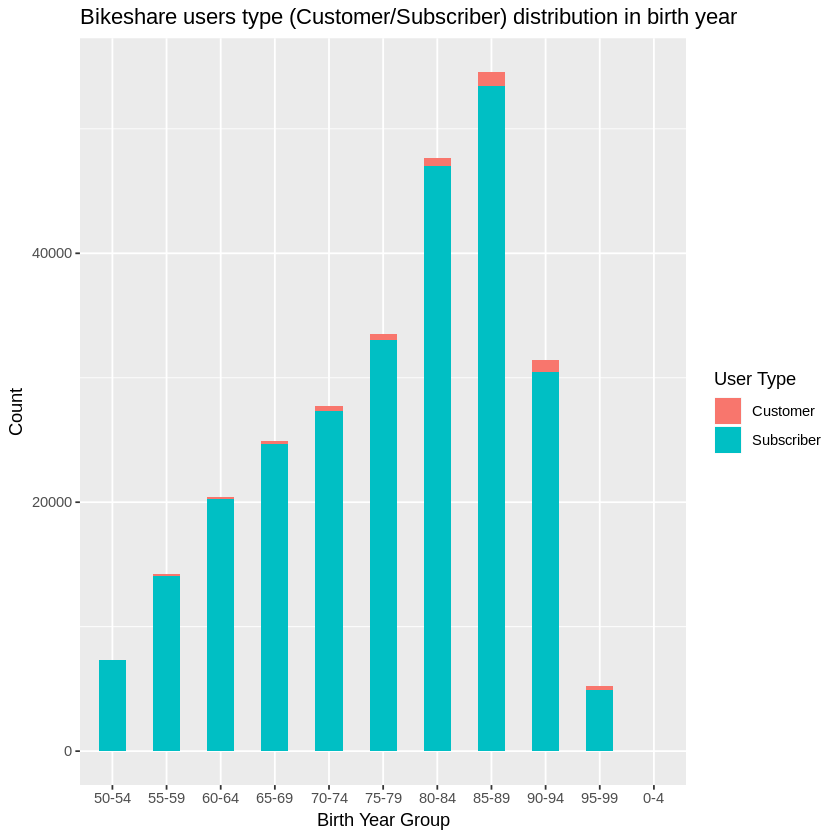

In [17]:
# Call the above 2 functions for cleaning and generate the graph.
ny_filtered2 = clean_null2(ny)
generate_plot2(ny_filtered2)

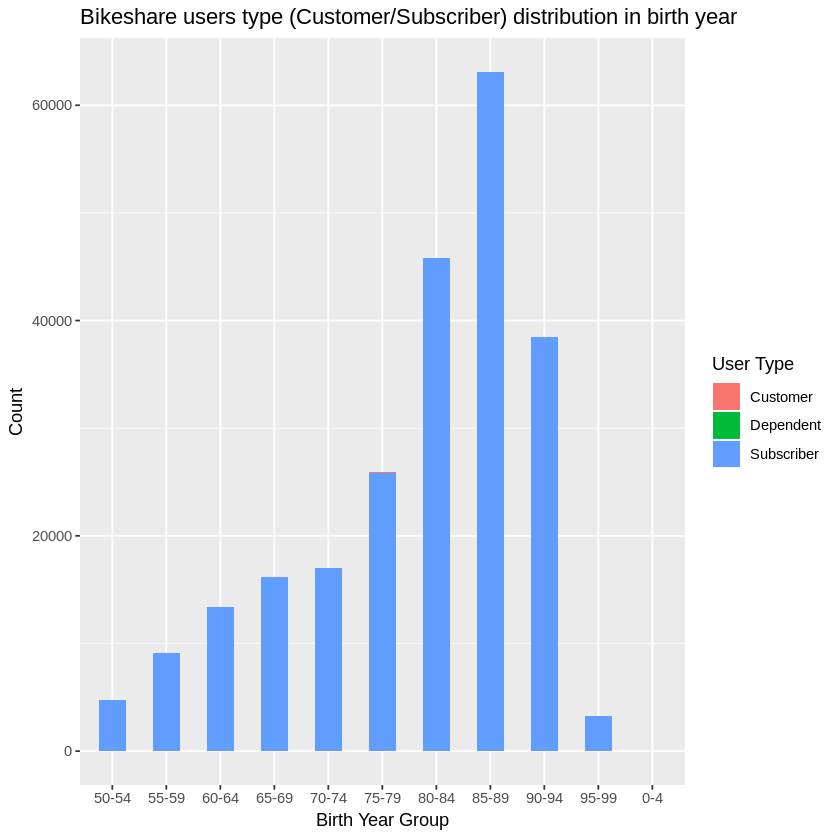

In [18]:
# Call the above 2 functions for cleaning and generate the graph.
chi_filtered2 = clean_null2(chi)
generate_plot2(chi_filtered2)

In [19]:
print(table(ny_filtered2$User.Type))


             Customer Subscriber 
         0       4416     266672 


In [20]:
print(table(ny_filtered2$Birth.Year.Group,ny_filtered2$User.Type))

       
              Customer Subscriber
  50-54     0       45       7292
  55-59     0      100      14101
  60-64     0      160      20252
  65-69     0      259      24645
  70-74     0      340      27364
  75-79     0      483      33011
  80-84     0      679      46973
  85-89     0     1070      53478
  90-94     0      953      30476
  95-99     0      317       4911
  0-4       0        0         38
  5-9       0        0          0


In [21]:
print(table(chi_filtered2$User.Type))


  Customer  Dependent Subscriber 
        91          1     238889 


In [22]:
print(table(chi_filtered2$Birth.Year.Group,chi_filtered2$User.Type))

       
        Customer Dependent Subscriber
  50-54        0         0       4779
  55-59        3         0       9093
  60-64        1         0      13345
  65-69        1         0      16135
  70-74        2         0      17022
  75-79       46         1      25878
  80-84       15         0      45815
  85-89       10         0      63061
  90-94        7         0      38478
  95-99        6         0       3225
  0-4          0         0         22
  5-9          0         0          0


---
**When I posed the second question, I was genuinely curious about the portion of this extensive user group that consists of regular subscription users, as opposed to one-time consumers driven by curiosity or necessity. To gain deeper insights, I conducted a thorough investigation of users born in various time periods, aiming to find answers through the analysis of subscription data. The outcomes presented in the graph have exceeded my initial expectations.**

**In New York, the number of subscriptions far surpasses that of single-time consumption customers, indicating a strong preference for ongoing commitments to the service. Similarly, in Chicago, almost 100% of users have opted for shared bicycle subscriptions, underscoring a clear inclination towards sustained usage. Although the scenario in Washington exhibits some variation, the number of subscriptions is still projected to surpass more than double the count of one-time customers.**

**Remarkably, young and middle-aged individuals born in the 1980s continue to be the primary advocates and enthusiasts of shared bicycles. Their dedication to this mode of transportation makes them influential leaders within the vibrant community of shared bicycle users.**

---

### Question 3

**Your question 3 goes here.**

**In each city, what are the top 10 routes with the longest biking time?** 

In [23]:
# Let's have a function to do everything for us, this function take a data frame as a parameter

generate_plot3 = function(dataFrame, title){
    
    options(repr.plot.width = 15, repr.plot.height = 8)
    # first let's have a column that combines the star and end station, which we call route
    dataFrame$Traval.Info <- paste(dataFrame$Start.Station, dataFrame$End.Station, sep = " to ")
    
    # us table library to calculate the total time ride of each route, we store them in a list
    TotalDuration.Info <- table(dataFrame$Traval.Info)
    
    # next we sort this list by its values
    TotalDuration.Info <- sort(TotalDuration.Info, decreasing = TRUE)
    
    # we can have the first 10 items from the list, which we will use them into our plot
    top_10_route <- c(TotalDuration.Info[1:10]) # I want tio use minutes instead of seconds
    
    par(mar = c(5, 25, 4, 8)) # adjust the size to better display the route name and duration
    xlim <- c(0, max(top_10_route) * 1.2)
    
    #I think display them horizontally is better, let's plot them now
    bp <- barplot(top_10_route, horiz = TRUE, col = "skyblue", las = 1,xlim = xlim)
    
    #Give it some labels for better indication
    text(x = top_10_route, y = bp, labels = round(top_10_route, 2), pos = 4, col = "black", cex = 1)
    title (main = title, line = 1.5)
    
    # Add extra x-label using title ()
    title(x = "The number of times each route was used", line = 2)
}


### New York

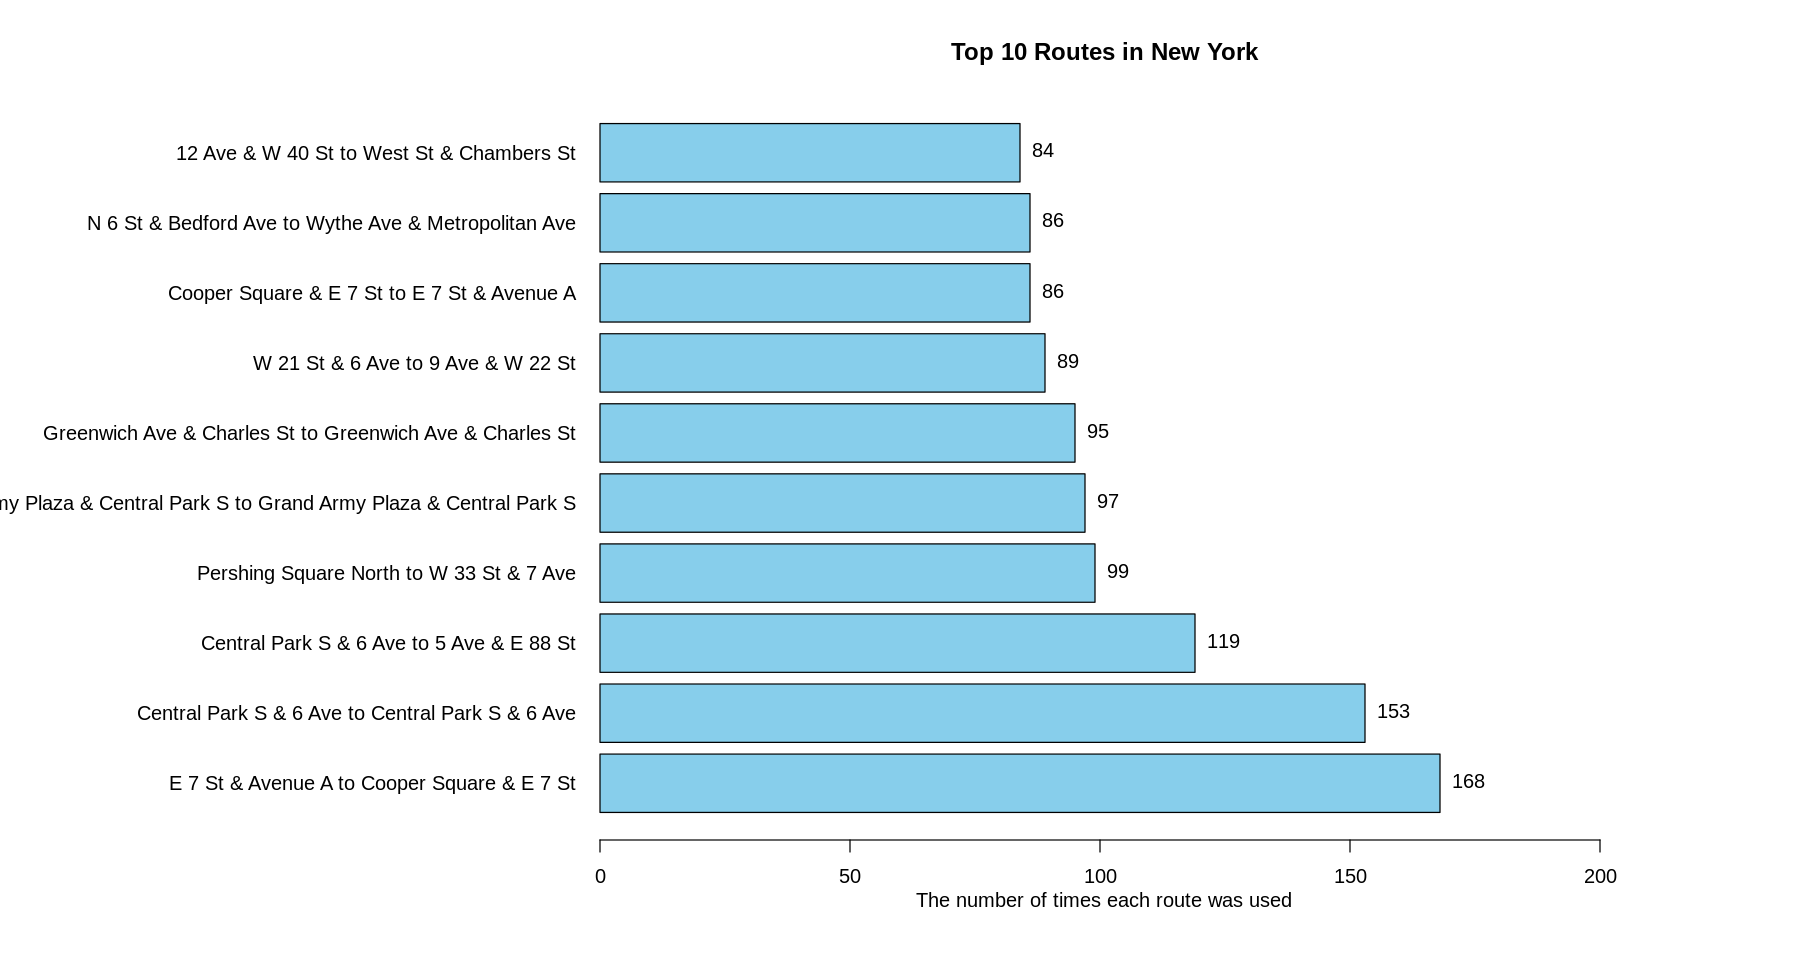

In [24]:
generate_plot3(ny, title = "Top 10 Routes in New York")

### Washington

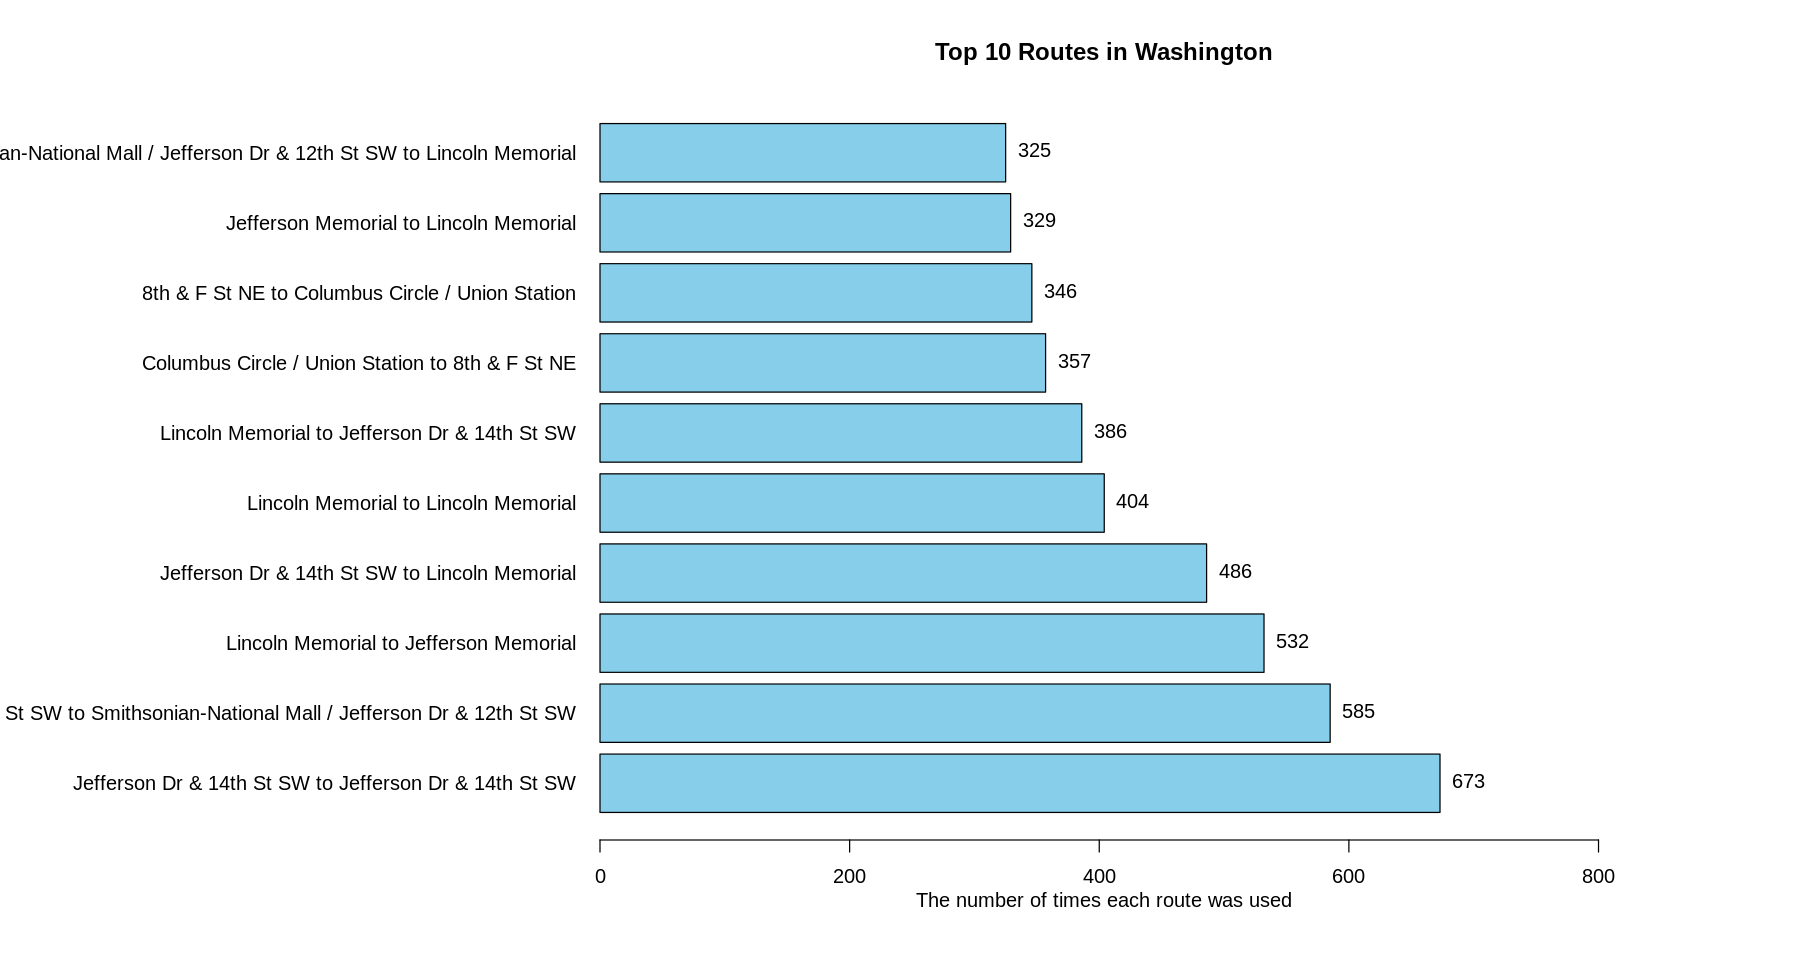

In [25]:
generate_plot3(wash, title = "Top 10 Routes in Washington")

### Chicago

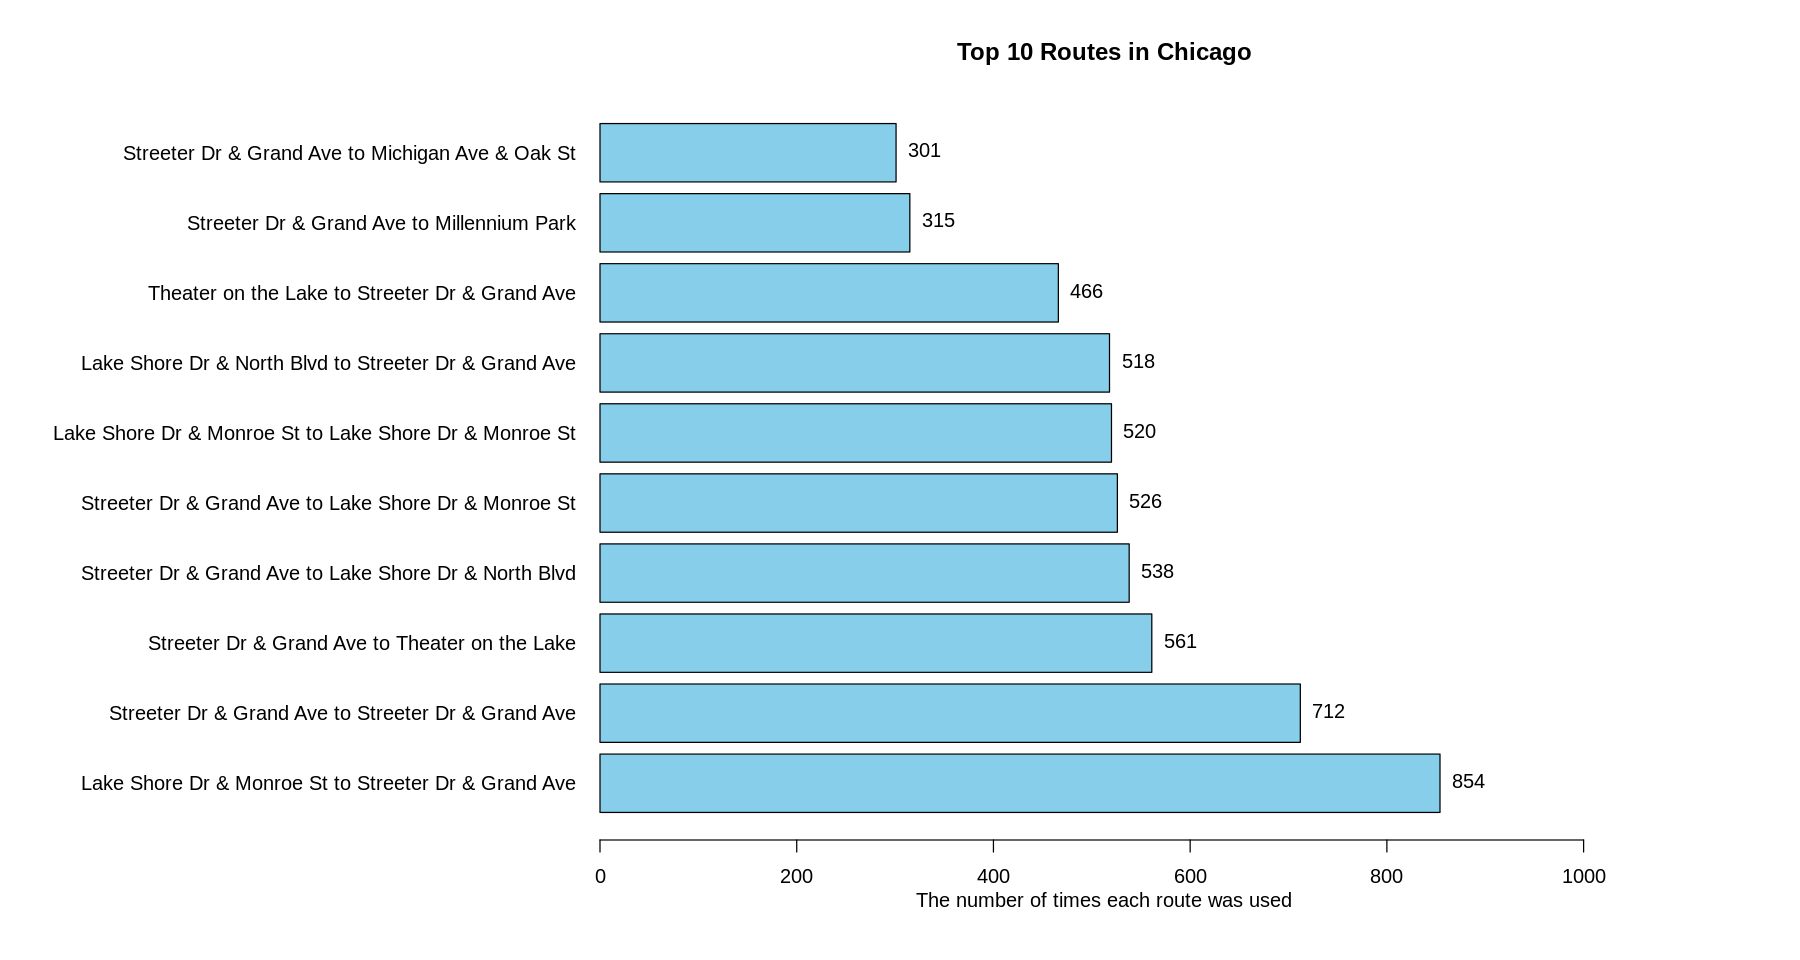

In [26]:
generate_plot3(chi, title = "Top 10 Routes in Chicago")

---
**Finally, I endeavored to observe the most popular routes in each city from a business perspective. To achieve this, I mapped out the routes by pairing the start and end points, subsequently tallying the frequency of each route's usage. By sorting the routes based on their usage frequency, I obtained the top 10 rankings of the most sought-after routes in each city.**

**As you can see through the above 3 graphs, the routes with higher demand can sometimes be more than 2 times the most popular route from the ranking. Such as Chicago, the rank number one route from lake shore Dr&Monroe St to Streeter Dr Grand Ave has 854 rides while the 10th route from Streeter Dr Grand Ave to Michigan Ave&Oak st only have 301.**

**Same kind of situation happens in Washington and New York city. Such analysis proves invaluable for strategically allocating shared bicycles to accommodate high demand along bustling roads.**

---


## Finishing Up

> Congratulations!  You have reached the end of the Explore Bikeshare Data Project. You should be very proud of all you have accomplished!

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the [rubric](https://review.udacity.com/#!/rubrics/2508/view). 


## Directions to Submit

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [27]:
system('python -m nbconvert Explore_bikeshare_data.ipynb')